In [1]:
import pandas as pd 
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline

In [2]:
# Load the dataset
data = pd.read_csv("creditcard.csv")

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.shape

(284807, 31)

In [5]:
for row in data.columns:
    print(row)

Time
V1
V2
V3
V4
V5
V6
V7
V8
V9
V10
V11
V12
V13
V14
V15
V16
V17
V18
V19
V20
V21
V22
V23
V24
V25
V26
V27
V28
Amount
Class


In [6]:
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [7]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Text(0, 0.5, 'Frequency')

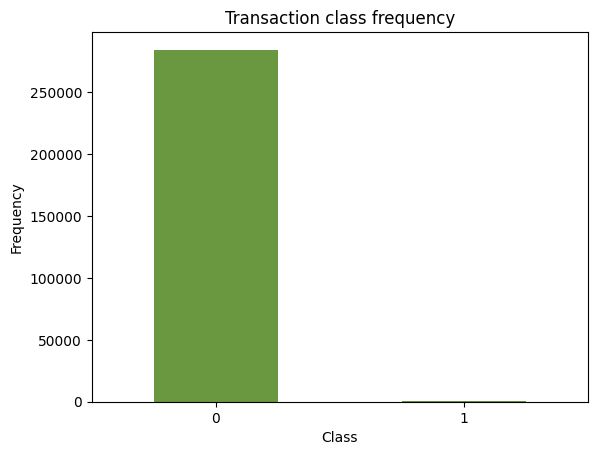

In [8]:
# plot of normal vs fraud transaction frequency

count_classes = pd.value_counts(data['Class'], sort= True)

count_classes.plot(kind = 'bar', rot = 0, color='#699841')

plt.title("Transaction class frequency")

plt.xlabel("Class")

plt.ylabel("Frequency")

In [9]:
fraud = data[data['Class'] == 1]

normal = data[data['Class'] == 0]

In [10]:
print(fraud.shape, normal.shape)

(492, 31) (284315, 31)


In [11]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [12]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

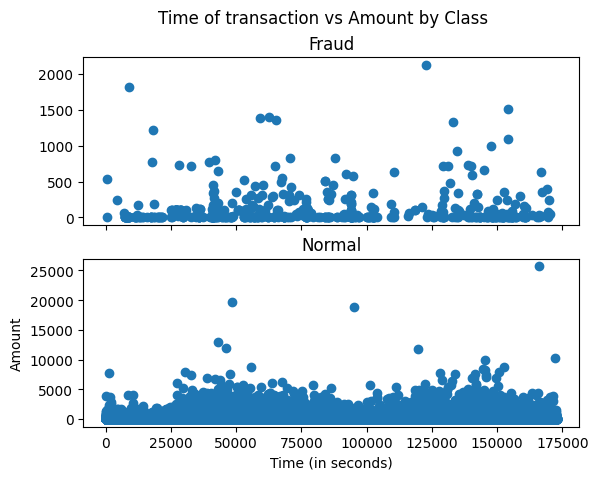

In [13]:
# Time vs Amount plot of Fraud and Normal transactions

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by Class')

ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')

ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')

plt.xlabel("Time (in seconds)")
plt.ylabel("Amount")

plt.show()

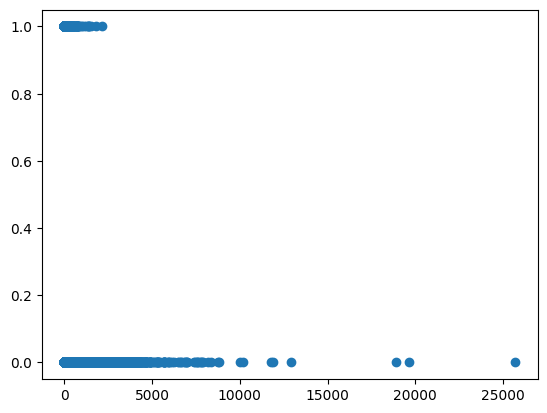

In [14]:
plt.scatter(data['Amount'], data['Class'])

In [15]:
normal_sample = normal.sample(n=fraud.shape[0])

data = pd.concat([normal_sample, fraud], axis=0)

print(data.shape)

data['Class'].value_counts()

(984, 31)


Class
0    492
1    492
Name: count, dtype: int64

Text(0, 0.5, 'Frequency')

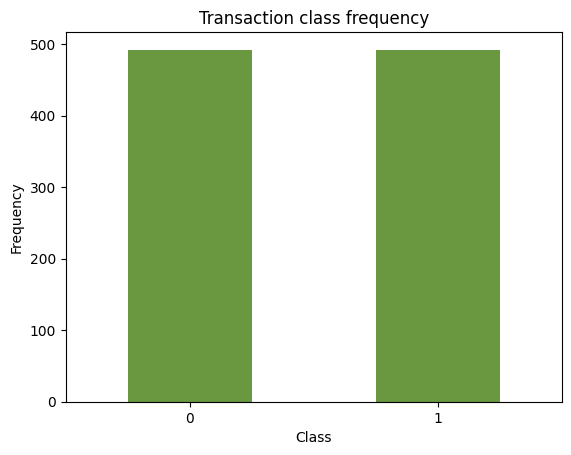

In [16]:
count_classes = pd.value_counts(data['Class'], sort= True)

count_classes.plot(kind = 'bar', rot = 0, color='#699841')

plt.title("Transaction class frequency")

plt.xlabel("Class")

plt.ylabel("Frequency")

In [17]:
data.shape

data['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [18]:
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,90312.306911,0.064677,-0.068243,0.048618,0.046133,-0.005598,0.074509,0.010193,0.034721,0.015014,...,0.017074,0.013574,0.006281,0.009460,-0.027603,0.038030,-0.017362,0.011909,-0.007149,101.727215
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [19]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000, lambda_param=0.1):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.lambda_param = lambda_param
        self.theta = None
        self.cost_history = None

    @staticmethod
    def sigmoid(z):
        """Compute the sigmoid function."""
        exp_vals = np.exp(-np.clip(z, -700, 700))
        return 1 / (1 + exp_vals)

    @staticmethod
    def add_bias_term(X):
        """Add a bias term (column of ones) to the feature matrix."""
        return np.c_[np.ones((X.shape[0], 1)), X]

    def initialize_weights(self, num_features):
        """Initialize weights with zeros."""
        return np.zeros((num_features, 1))

    def compute_regularization_term(self):
        """Compute the regularization term for logistic regression."""
        m = len(self.theta)
        return (self.lambda_param / (2 * m)) * np.sum(self.theta[1:]**2)

    def compute_cost(self, X_b, y):
        """Compute the logistic regression cost function with regularization."""
        m = len(y)
        logits = X_b.dot(self.theta)
        predictions = self.sigmoid(logits)

        # Avoid log(0) or log(1) by clipping
        clipped_predictions = np.clip(predictions, 1e-15, 1-1e-15)

        # Compute the cost with regularization
        cost = -1/m * (y.dot(np.log(clipped_predictions)) + (1 - y).dot(np.log(1 - clipped_predictions)))
        regularization_term = self.compute_regularization_term()
        cost += regularization_term

        return cost

    def gradient_descent(self, X_b, y):
        """Perform gradient descent to optimize logistic regression weights."""
        m = len(y)
        costs = []
    
        for iteration in range(self.n_iterations):
            logits = X_b.dot(self.theta)
            predictions = self.sigmoid(logits)
            errors = predictions - np.array(y).reshape(-1, 1)  # Convert y to a NumPy array before reshaping
            gradient = X_b.T.dot(errors) / m
    
            # Exclude regularization term for bias weight
            regularization_grad = (self.lambda_param / m) * np.concatenate([np.zeros((1, 1)), self.theta[1:]])
    
            self.theta -= self.learning_rate * (gradient + regularization_grad)
    
            # Compute and store cost for monitoring convergence
            cost = self.compute_cost(X_b, y)
            costs.append(cost)
    
        self.cost_history = costs


    def fit(self, X, y):
        """Fit the logistic regression model to the training data."""
        X_b = self.add_bias_term(X)
        self.theta = self.initialize_weights(X_b.shape[1])
        self.gradient_descent(X_b, y)

    def predict(self, X):
        """Make predictions based on the logistic regression model."""
        X_b = self.add_bias_term(X)
        probabilities = self.sigmoid(X_b.dot(self.theta))
        predictions = (probabilities >= 0.5).astype(int)
        return predictions

    def evaluate(self, y_true, y_pred):
        """Evaluate accuracy based on true and predicted labels."""
        y_true = np.array(y_true).flatten()  # Ensure y_true is 1-dimensional
        y_pred = np.array(y_pred).flatten()  # Ensure y_pred is 1-dimensional
    
        accuracy = np.mean(y_true == y_pred)
        return accuracy


In [20]:
class_names=np.array(['Normal (0)','Fraud (1)']) # Binary label, Class = 1 (fraud) and Class = 0 (no fraud)

In [21]:
import itertools
# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [22]:
# splitting data into features (X) and target variable (y)
X = data.drop('Class', axis=1)
Y = data['Class']

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
learning_rate = 0.01
num_iterations = 1000

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a logistic regression model
logreg_model = LogisticRegression()

# Train the model
logreg_model.fit(X_train_scaled, y_train)

LogisticRegression()

Train Accuracy: 0.9453621346886912

Classification Report on Train Set:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95       393
           1       0.98      0.91      0.94       394

    accuracy                           0.95       787
   macro avg       0.95      0.95      0.95       787
weighted avg       0.95      0.95      0.95       787



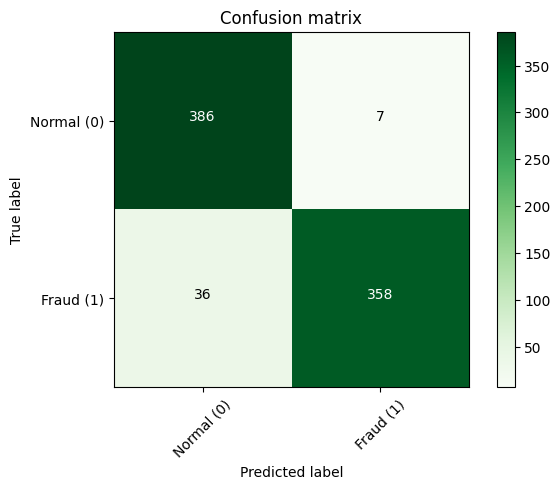

In [24]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the training sets
predictions_train = logreg_model.predict(X_train_scaled)

# plot confusion matrix
cm = confusion_matrix(y_train, predictions_train)
plot_confusion_matrix(cm,class_names)

# Evaluate the model
train_accuracy = accuracy_score(y_train, predictions_train)

print("Train Accuracy:", train_accuracy)

# Additional evaluation metrics
print("\nClassification Report on Train Set:")
print(classification_report(y_train, predictions_train))

Test Accuracy: 0.934010152284264

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94        99
           1       0.98      0.89      0.93        98

    accuracy                           0.93       197
   macro avg       0.94      0.93      0.93       197
weighted avg       0.94      0.93      0.93       197



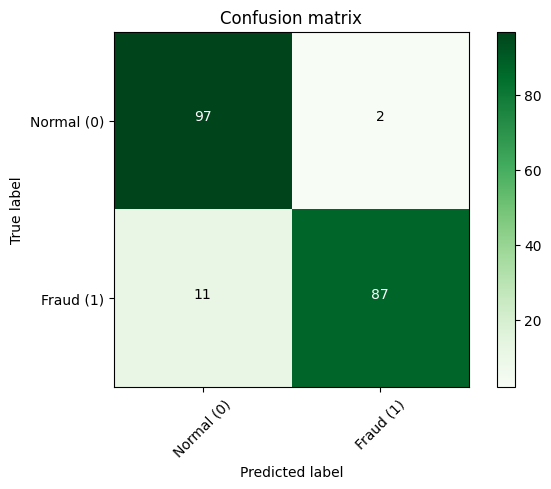

In [25]:
predictions_test = logreg_model.predict(X_test_scaled)

test_accuracy = accuracy_score(y_test, predictions_test)

print("Test Accuracy:", test_accuracy)

# plot confusion matrix
cm = confusion_matrix(y_test, predictions_test)
plot_confusion_matrix(cm,class_names)

# Additional evaluation metrics
print("\nClassification Report on Test Set:")
print(classification_report(y_test, predictions_test))